In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = '/dir_to_folder_with_pizza_baseline.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(os.path.join(base_dir, 'pizza_baseline.csv'))


In [ ]:
# display(df[df['algorithm']=='hierarchical'])
display(df)

,ix_str,prompt,original_prompt,algorithm,attr_method,perturb_method,target_sal_percentage,prompt_length,salient_percentage,api_calls,duration,mean_target_attr,mean_key_attr,correct,key_strs,answer,completion,unit,all_attr,key_attr
0,"['iterative', 'cosine', 'fixed', 0.5, 'What is...",What is the capital of Japan? Answer in one nu...,What is the capital of Japan?,iterative,cosine,fixed,0.50,12,0.166667,13,1.585550,0.202280,0.611408,True,"['capital', 'Japan']",Tokyo,Tokyo,word,{'What (0)': {'Tok (0)': -4.76837158203125e-07...,"{'capital': 0.5251778066158295, 'Japan': 0.697..."
1,"['iterative', 'prob_diff', 'fixed', 0.5, 'What...",What is the capital of Japan? Answer in one nu...,What is the capital of Japan?,iterative,prob_diff,fixed,0.50,12,0.166667,13,1.200968,0.329231,0.813993,True,"['capital', 'Japan']",Tokyo,Tokyo,word,{'What (0)': {'Tokyo (0)': 1.1920364983986076e...,"{'capital': 0.6371677476941334, 'Japan': 0.990..."
2,"['hierarchical', 'cosine', 'fixed', 0.5, 'What...",What is the capital of Japan? Answer in one nu...,What is the capital of Japan?,hierarchical,cosine,fixed,0.50,12,0.166667,17,5.086899,0.114028,0.277599,True,"['capital', 'Japan']",Tokyo,Tokyo,word,"{'What (0)': {'Tok (0)': 0.035931027597851224,...","{'capital': 0.24693921953439713, 'Japan': 0.30..."
3,"['hierarchical', 'prob_diff', 'fixed', 0.5, 'W...",What is the capital of Japan? Answer in one nu...,What is the capital of Japan?,hierarchical,prob_diff,fixed,0.50,12,0.166667,17,15.180291,0.184250,0.386369,True,"['capital', 'Japan']",Tokyo,Tokyo,word,{'What (0)': {'Tokyo (0)': 0.05555554479929826...,"{'capital': 0.3618383663811208, 'Japan': 0.410..."
4,"['iterative', 'cosine', 'fixed', 0.1, '. . . ....",. . . . . . . . What is the capital of Japan? ...,What is the capital of Japan?,iterative,cosine,fixed,0.10,20,0.100000,21,1.366306,0.121368,0.611408,True,"['capital', 'Japan']",Tokyo,Tokyo,word,"{'. (0)': {'Tok (0)': -4.76837158203125e-07, '...","{'capital': 0.5251778066158295, 'Japan': 0.697..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,"['hierarchical', 'prob_diff', 'fixed', 0.1, '....",. . . . . . . . . What is frozen water called?...,What is frozen water called?,hierarchical,prob_diff,fixed,0.10,20,0.100000,24,7.997246,0.128854,0.360692,True,"['frozen', 'water']",ice,Ice,word,"{'. (0)': {'Ice (0)': 0.00019664143780831478},...","{'frozen': 0.37986919487570003, 'water': 0.341..."
116,"['iterative', 'cosine', 'fixed', 0.01, '. . . ...",. . . . . . . . . . . . . . . . . . . . . . . ...,What is frozen water called?,iterative,cosine,fixed,0.01,200,0.010000,201,18.199178,0.010323,0.541306,True,"['frozen', 'water']",ice,Ice,word,"{'. (0)': {'Ice (0)': 0.0}, ' . (1)': {'Ice (0...","{'frozen': 0.5434795618057251, 'water': 0.5391..."
117,"['iterative', 'prob_diff', 'fixed', 0.01, '. ....",. . . . . . . . . . . . . . . . . . . . . . . ...,What is frozen water called?,iterative,prob_diff,fixed,0.01,200,0.010000,201,15.075664,0.017901,0.816293,True,"['frozen', 'water']",ice,Ice,word,"{'. (0)': {'Ice (0)': -6.913704346689364e-06},...","{'frozen': 0.9999809723900273, 'water': 0.6326..."
118,"['hierarchical', 'cosine', 'fixed', 0.01, '. ....",. . . . . . . . . . . . . . . . . . . . . . . ...,What is frozen water called?,hierarchical,cosine,fixed,0.01,200,0.010000,6,2.752150,0.003140,0.009421,True,"['frozen', 'water']",ice,Ice.,word,"{'. (0)': {'Ice (0)': 1.1920928955078125e-09, ...","{'frozen': 0.009420878291130067, 'water': 0.00..."


# New

In [ ]:
df['Strategy'] = df['algorithm'].str.capitalize().str[0] + '+' + df['attr_method'].str.capitalize().str[0]

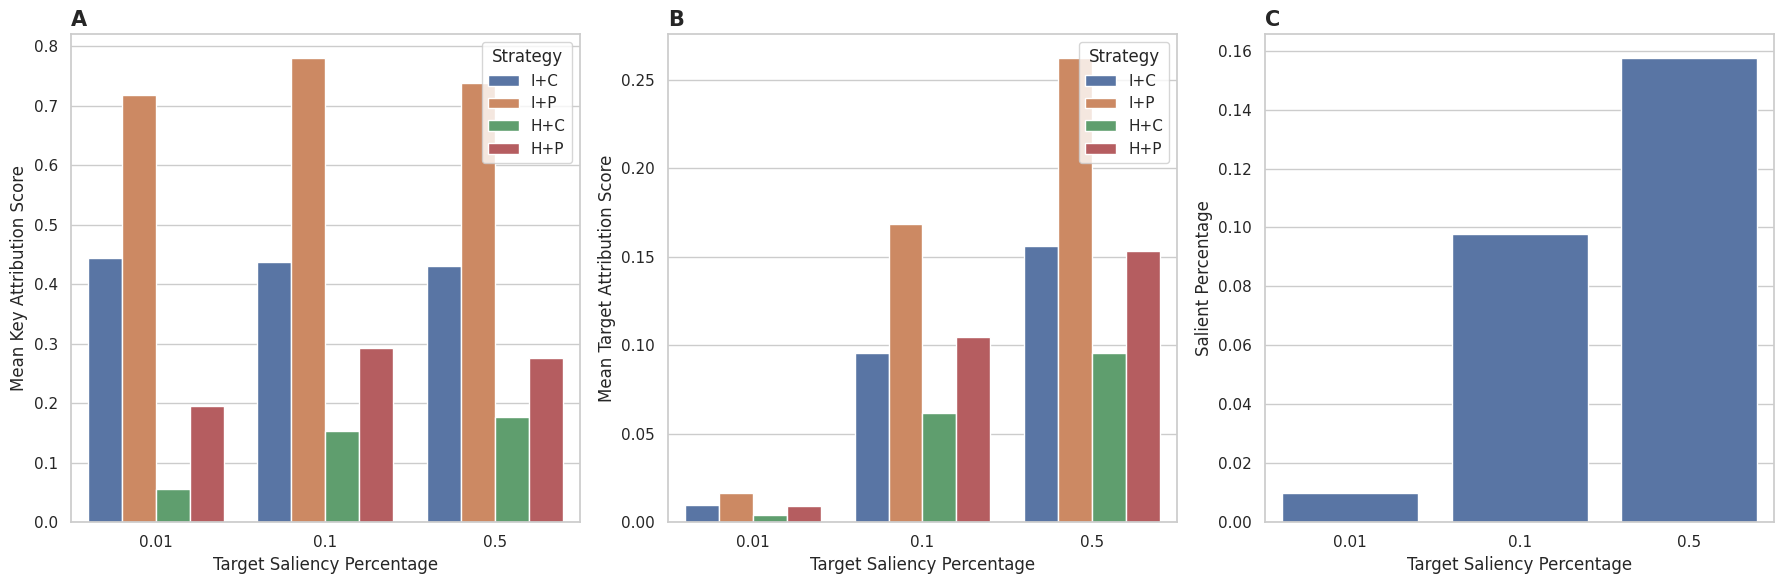

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(ax=axes[0], x='target_sal_percentage', y='mean_key_attr', hue='Strategy', data=df, errorbar=None)
axes[0].set_title('A', loc='left', fontweight='bold', fontsize=15)
axes[0].set_xlabel('Target Saliency Percentage')
axes[0].set_ylabel('Mean Key Attribution Score')
axes[1].legend(title='Strategy', loc='upper right')

sns.barplot(ax=axes[1], x='target_sal_percentage', y='mean_target_attr', hue='Strategy', data=df, errorbar=None)
axes[1].set_title('B', loc='left', fontweight='bold', fontsize=15)
axes[1].set_xlabel('Target Saliency Percentage')
axes[1].set_ylabel('Mean Target Attribution Score')
axes[1].legend(title='Strategy', loc='upper right')

sns.barplot(ax=axes[2], x='target_sal_percentage', y='salient_percentage', data=df, errorbar=None)
axes[2].set_title('C', loc='left', fontweight='bold', fontsize=15)
axes[2].set_xlabel('Target Saliency Percentage')
axes[2].set_ylabel('Salient Percentage')

plt.tight_layout()

plt.show()


In [ ]:
grouped = df.groupby(['algorithm', 'attr_method', 'perturb_method']).agg({
    'api_calls': 'mean',
    'duration': 'mean',
    'mean_target_attr': 'mean',
    'mean_key_attr': 'mean',
    'correct': lambda x: x.mean() * 100
}).reset_index()

grouped.rename(columns={
    'algorithm': 'Algorithm',
    'attr_method': 'Attribution Method',
    'perturb_method': 'Perturbation Method',
    'api_calls': 'Mean API Calls',
    'duration': 'Mean Duration (s)',
    'mean_target_attr': 'Mean Target Attr',
    'mean_key_attr': 'Mean Key Attr',
    'correct': 'Correct Attribution (%)'
}, inplace=True)

grouped[['Mean API Calls', 'Mean Duration (s)', 'Mean Target Attr', 'Mean Key Attr', 'Correct Attribution (%)']] = grouped[['Mean API Calls', 'Mean Duration (s)', 'Mean Target Attr', 'Mean Key Attr', 'Correct Attribution (%)']].round(3)

display(grouped)

,Algorithm,Attribution Method,Perturbation Method,Mean API Calls,Mean Duration (s),Mean Target Attr,Mean Key Attr,Correct Attribution (%)
0,hierarchical,cosine,fixed,23.267,9.847,0.054,0.129,100.000
1,hierarchical,prob_diff,fixed,31.000,170.672,0.089,0.255,96.667
2,iterative,cosine,fixed,82.933,17.011,0.087,0.438,96.667
3,iterative,prob_diff,fixed,82.933,40.976,0.149,0.746,100.000


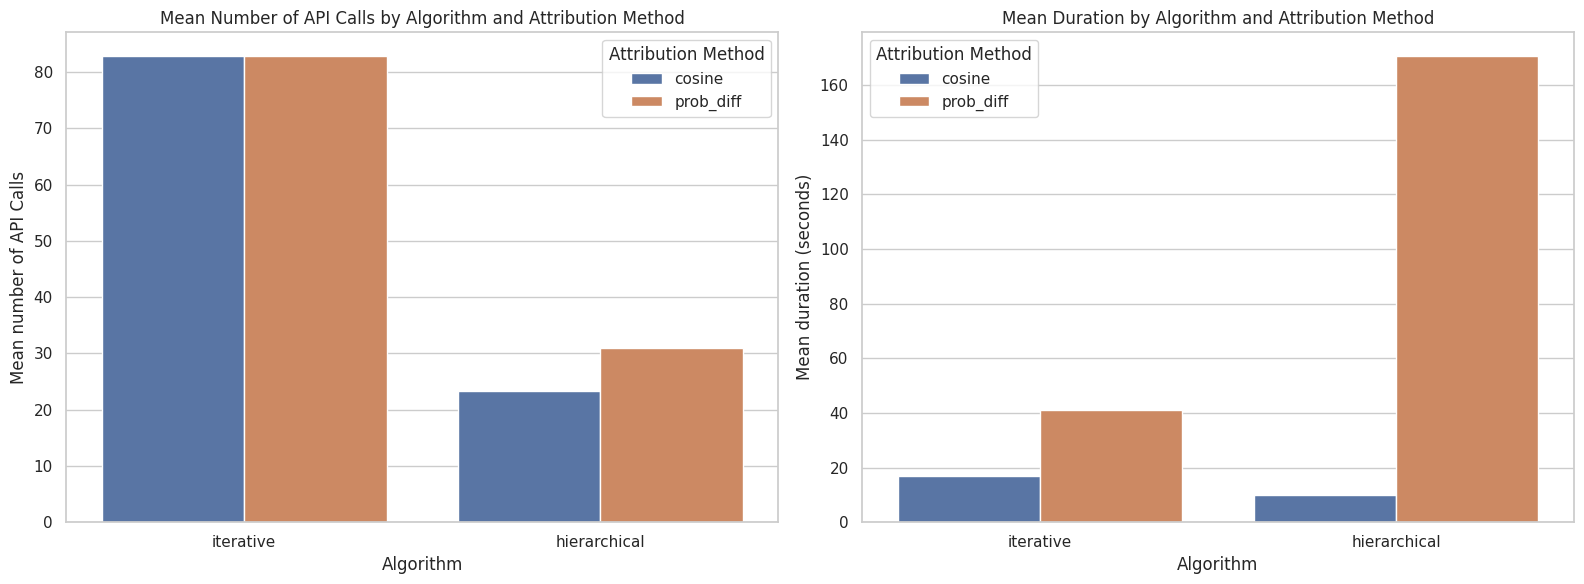

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0], x='algorithm', y='api_calls', hue='attr_method', data=df, errorbar=None)
axes[0].set_title('Mean Number of API Calls by Algorithm and Attribution Method')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Mean number of API Calls')
axes[0].legend(title='Attribution Method')

sns.barplot(ax=axes[1], x='algorithm', y='duration', hue='attr_method', data=df, errorbar=None)
axes[1].set_title('Mean Duration by Algorithm and Attribution Method')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Mean duration (seconds)')
axes[1].legend(title='Attribution Method')

plt.tight_layout()

plt.show()


# Old

In [ ]:
grouped = df.groupby(['algorithm', 'attr_method', 'perturb_method']).agg({
    'api_calls': 'mean',
    'duration': 'mean',
    'mean_target_attr': 'mean',
    'mean_key_attr': 'mean',
    'correct': lambda x: x.mean() * 100
}).reset_index()

grouped.rename(columns={
    'algorithm': 'Algorithm',
    'attr_method': 'Attribution Method',
    'perturb_method': 'Perturbation Method',
    'api_calls': 'Mean API Calls',
    'duration': 'Mean Duration (s)',
    'mean_target_attr': 'Mean Target Attr',
    'mean_key_attr': 'Mean Key Attr',
    'correct': 'Correct Attribution (%)'
}, inplace=True)

grouped[['Mean API Calls', 'Mean Duration (s)', 'Mean Target Attr', 'Mean Key Attr', 'Correct Attribution (%)']] = grouped[['Mean API Calls', 'Mean Duration (s)', 'Mean Target Attr', 'Mean Key Attr', 'Correct Attribution (%)']].round(3)

display(grouped)

,Algorithm,Attribution Method,Perturbation Method,Mean API Calls,Mean Duration (s),Mean Target Attr,Mean Key Attr,Correct Attribution (%)
0,hierarchical,cosine,fixed,23.267,9.847,0.054,0.129,100.000
1,hierarchical,prob_diff,fixed,31.000,170.672,0.089,0.255,96.667
2,iterative,cosine,fixed,82.933,17.011,0.087,0.438,96.667
3,iterative,prob_diff,fixed,82.933,40.976,0.149,0.746,100.000


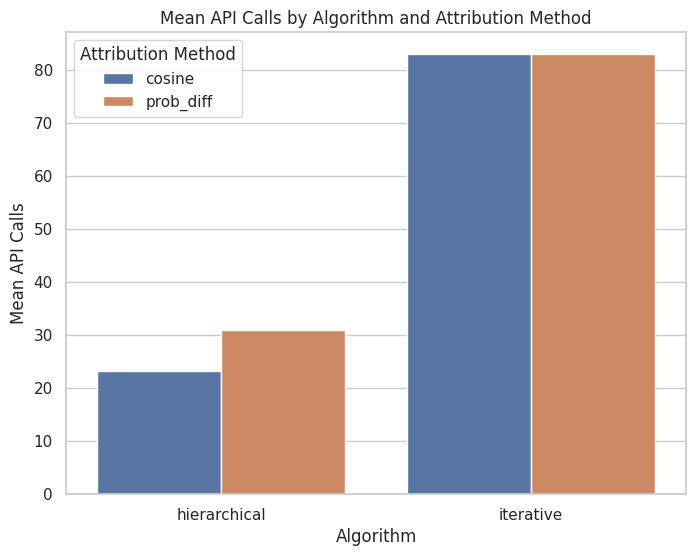

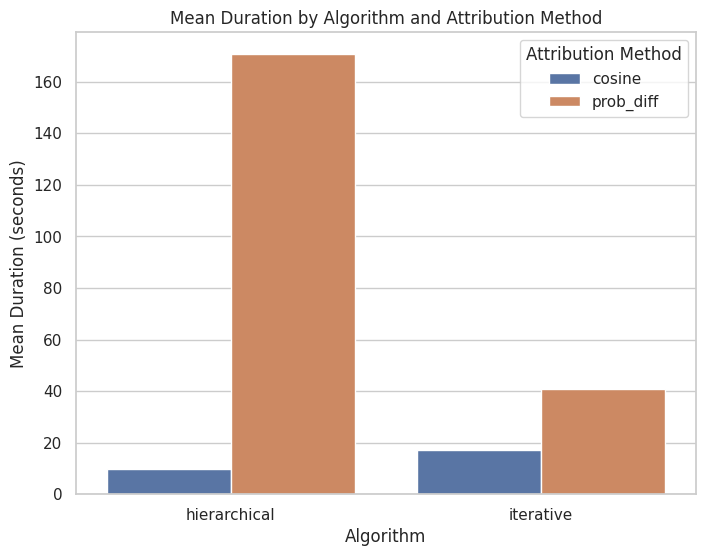

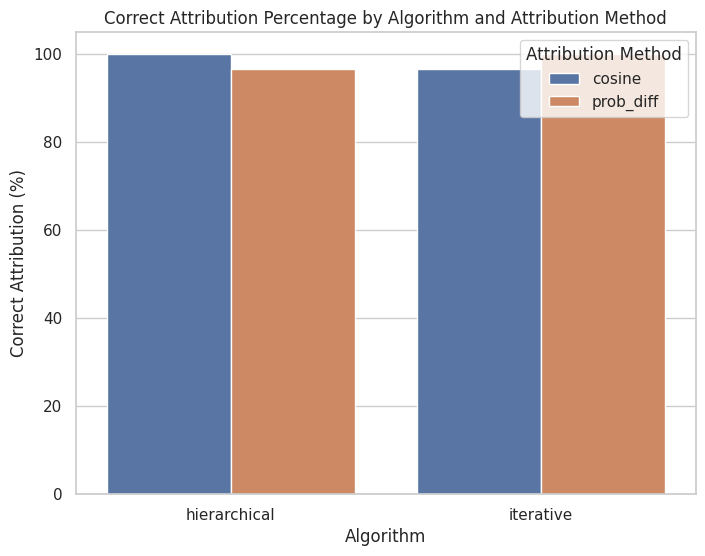

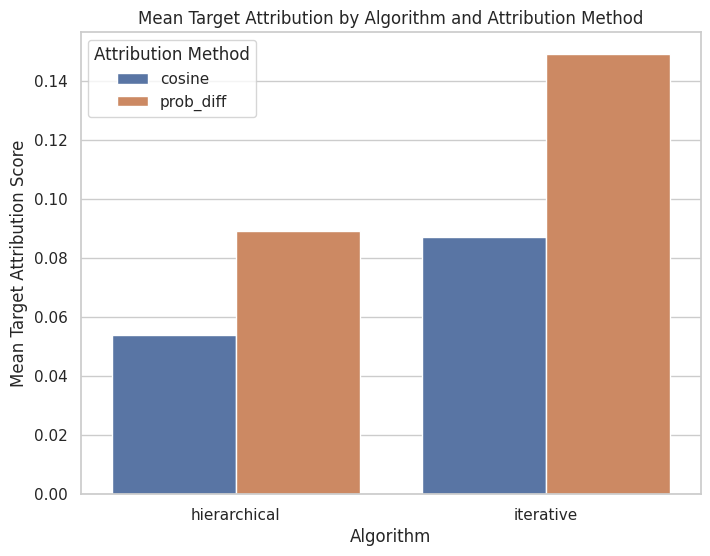

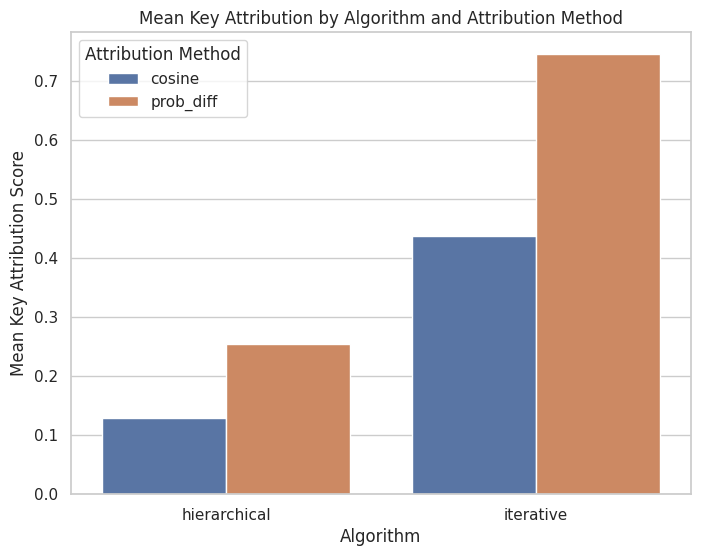

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Mean API Calls', hue='Attribution Method', data=grouped)
plt.title('Mean API Calls by Algorithm and Attribution Method')
plt.ylabel('Mean API Calls')
plt.legend(title='Attribution Method')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Mean Duration (s)', hue='Attribution Method', data=grouped)
plt.title('Mean Duration by Algorithm and Attribution Method')
plt.ylabel('Mean Duration (seconds)')
plt.legend(title='Attribution Method')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Correct Attribution (%)', hue='Attribution Method', data=grouped)
plt.title('Correct Attribution Percentage by Algorithm and Attribution Method')
plt.ylabel('Correct Attribution (%)')
plt.legend(title='Attribution Method')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Mean Target Attr', hue='Attribution Method', data=grouped)
plt.title('Mean Target Attribution by Algorithm and Attribution Method')
plt.ylabel('Mean Target Attribution Score')
plt.legend(title='Attribution Method')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Mean Key Attr', hue='Attribution Method', data=grouped)
plt.title('Mean Key Attribution by Algorithm and Attribution Method')
plt.ylabel('Mean Key Attribution Score')
plt.legend(title='Attribution Method')
plt.show()